In [3]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import LoadAnnotationFunction as laf
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [1]:
dataDir='../data'
dataType='train_482_classes_updated'
annFile='{}/annotations/{}.json'.format(dataDir,dataType)
print(annFile)

../data/annotations/train_482_classes_updated.json


In [4]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.62s)
creating index...
index created!


In [7]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
aerosol_can airplane apricot apron armchair trash_can ashtray atomizer ax baby_buggy backpack handbag suitcase bagel bagpipe ball balloon banana bandage banner barbell barrow baseball_bat baseball_glove basket basketball_hoop basketball bath_mat beaker beanie bear bed bedspread cow beeper beer_can bell bell_pepper bench bib bicycle binder binoculars bird birdfeeder birdcage birdhouse biscuit_(bread) black_sheep blanket blender gameboard boat book book_bag booklet bottle bottle_opener bouquet bow_(weapon) bowl bracelet briefcase broom bucket bull bun buoy bus_(vehicle) business_card butcher_knife cab_(taxi) cabinet calendar calf camcorder camel camera can candle canister canoe canteen bottle_cap cape car_(automobile) railcar_(part_of_a_train) car_battery card cardigan carrot tote_bag cart carton cat cellular_telephone chain_mail chair chicken_(animal) crisp_(potato_chip) chocolate_bar chopping_board chopstick cigar_box cigarette cigarette_case clip clipboard clock clot

In [11]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['baby']);
imgIds = coco.getImgIds(catIds=catIds);
print((catIds))
print((imgIds))
if len(imgIds) != 0:
    print("There are ", len(imgIds), " images for this category.")
    img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
    print(img)
    img_videotitle = img['video']
    print("test",img['file_name'])
else:
    print("There are 0 images for this category.")

[805]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 78193, 78194, 78195, 78196, 78198, 78199, 78200, 78201, 78202, 78203, 78204, 78205, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 78211, 78212, 78213, 78214, 78215, 65849, 65850, 33083, 33084, 33085, 33086, 33087, 33088, 33089, 33090, 65851, 65852, 65853, 65854, 65855, 65856, 65857, 65858, 65859, 65860, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349

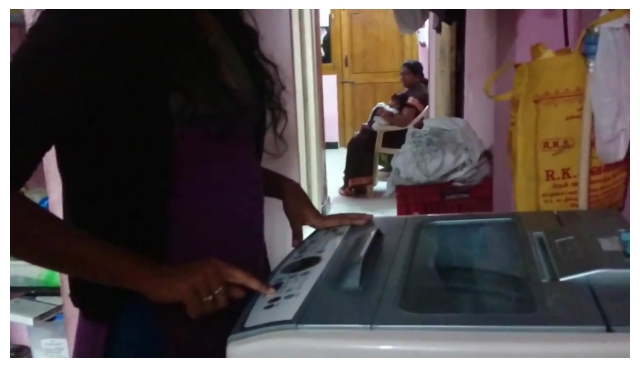

In [9]:
# load and display image

dataDir='../data/tao_train/frames'

I = io.imread('%s/%s'%(dataDir,img['file_name']))

plt.axis('off')
plt.imshow(I)
plt.show()

ImgID:  102364
AnnotationID:  [380075, 380076, 380078]
Annotations:  [{'segmentation': [[0, 0, 751, 0, 751, 720, 0, 720]], 'bbox': [0.0, 0.0, 751.0, 720.0], 'area': 540720, 'iscrowd': 0, 'id': 380075, 'image_id': 102364, 'category_id': 805, 'track_id': 16609, '_scale_uuid': '4a47cc11-92fc-4bed-8da7-6be875f8e114', 'scale_category': 'person', 'video_id': 2761, 'instance_id': 16609}, {'segmentation': [[678, 104, 864, 104, 864, 389, 678, 389]], 'bbox': [678.0, 104.0, 186.0, 285.0], 'area': 53010, 'iscrowd': 0, 'id': 380076, 'image_id': 102364, 'category_id': 805, 'track_id': 16610, '_scale_uuid': '0f0a8685-0cc0-4679-867b-ebcffe943d9c', 'scale_category': 'person', 'video_id': 2761, 'instance_id': 16610}, {'segmentation': [[708, 171, 821, 171, 821, 263, 708, 263]], 'bbox': [708.0, 171.0, 113.0, 92.0], 'area': 10396, 'iscrowd': 0, 'id': 380078, 'image_id': 102364, 'category_id': 805, 'track_id': 16612, '_scale_uuid': 'be0234d7-aea0-484a-94ce-9cc55d3eacd2', 'scale_category': 'person', 'video_i

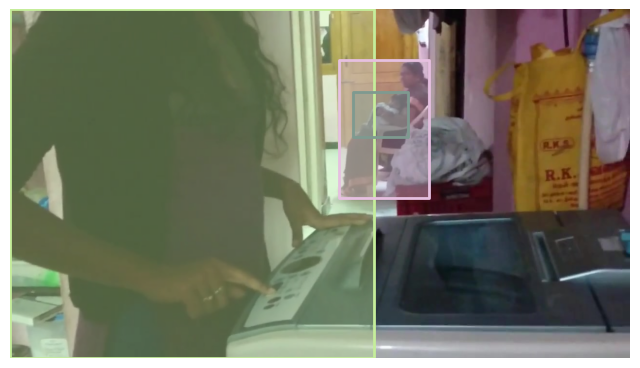

In [10]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
print("ImgID: ",img['id'])
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd= None)
print("AnnotationID: ",annIds)
anns = coco.loadAnns(annIds)
print("Annotations: ",anns)
coco.showAnns(anns)